In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
def clean_na(df, na_value = -9999):
    """ 
    ! replace Na from dataset
    """
    df = df.replace(to_replace=na_value,value=np.NaN)
    df = df[df.iloc[:,1].first_valid_index():]
    df = df.fillna(method='ffill')
    return df

In [3]:
# p = 0.01  # 1% of the lines
# # keep the header, then take only 1% of lines
# # if random from [0,1] interval is greater than 0.01 the row will be skipped
# df = pd.read_csv(
#     "south.csv", 
#     header=0, 
#     skiprows=lambda i: i>0 and random.random() > p)

df = pd.read_csv('south-reduced.csv')

In [4]:
df.size

2871428

In [5]:
initial_df = df # save data

In [6]:
df = initial_df
df = clean_na(df)
df.dropna(inplace=True)
df

,Unnamed: 0,index,date,hour,prcp,stp,smax,smin,gbrd,temp,...,wdct,gust,wdsp,regi,prov,wsnm,inme,lat,lon,elvt
0,0,285,2000-10-03,21:00,0.8,1004.7,1005.9,1004.7,123.0,15.1,...,79.0,13.0,4.7,S,RS,PORTO ALEGRE,A801,-30.050000,-51.166667,46.97
1,1,335,2000-10-05,23:00,0.0,1008.1,1008.1,1007.8,123.0,17.4,...,295.0,7.0,3.0,S,RS,PORTO ALEGRE,A801,-30.050000,-51.166667,46.97
2,2,340,2000-10-06,04:00,0.0,1008.2,1008.8,1008.2,123.0,13.3,...,247.0,2.4,0.9,S,RS,PORTO ALEGRE,A801,-30.050000,-51.166667,46.97
3,3,537,2000-10-14,09:00,0.0,1015.0,1015.0,1014.4,0.0,18.4,...,116.0,7.0,3.4,S,RS,PORTO ALEGRE,A801,-30.050000,-51.166667,46.97
4,4,625,2000-10-18,01:00,3.4,1012.5,1012.5,1011.2,0.0,21.5,...,340.0,9.2,4.4,S,RS,PORTO ALEGRE,A801,-30.050000,-51.166667,46.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102546,102546,269858,2021-03-26,02:00,0.0,922.2,922.4,922.2,4.0,21.5,...,60.0,5.2,2.6,S,RS,LAGOA VERMELHA,A844,-28.222381,-51.512845,833.83
102547,102547,269913,2021-03-28,09:00,0.0,918.0,918.4,917.9,4.0,17.3,...,47.0,4.2,2.7,S,RS,LAGOA VERMELHA,A844,-28.222381,-51.512845,833.83
102548,102548,270430,2021-04-18,22:00,0.0,921.7,921.7,921.5,3.0,19.3,...,148.0,6.0,3.3,S,RS,LAGOA VERMELHA,A844,-28.222381,-51.512845,833.83
102549,102549,270551,2021-04-23,23:00,0.0,921.2,921.2,920.8,3.0,17.9,...,63.0,3.3,2.3,S,RS,LAGOA VERMELHA,A844,-28.222381,-51.512845,833.83


In [7]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df = df.set_index('date')
df = df.resample('M').mean() # aggregate average data by month
# df = df.groupby(pd.Grouper(key='date', freq='1M')).mean()
df = df[['wdsp', 'hmdy', 'tmax', 'gbrd', 'smax', 'prcp']]
df

,wdsp,hmdy,tmax,gbrd,smax,prcp
date,,,,,,
2000-10-31,2.418182,79.181818,20.700000,719.818182,1009.900000,0.490909
2000-11-30,2.485714,71.857143,21.000000,1532.571429,1008.528571,0.857143
2000-12-31,2.266667,78.000000,20.933333,471.333333,1003.400000,0.000000
2001-01-31,1.516667,72.166667,26.033333,2247.666667,1004.933333,0.000000
2001-02-28,1.485714,86.571429,24.071429,530.428571,1007.185714,0.000000
...,...,...,...,...,...,...
2020-12-31,2.325598,72.181435,23.292405,1541.185654,956.569620,0.113924
2021-01-31,2.208727,79.583691,22.327325,1274.151645,955.757797,0.382833
2021-02-28,2.174057,75.281447,22.432704,1531.492138,954.948113,0.444025


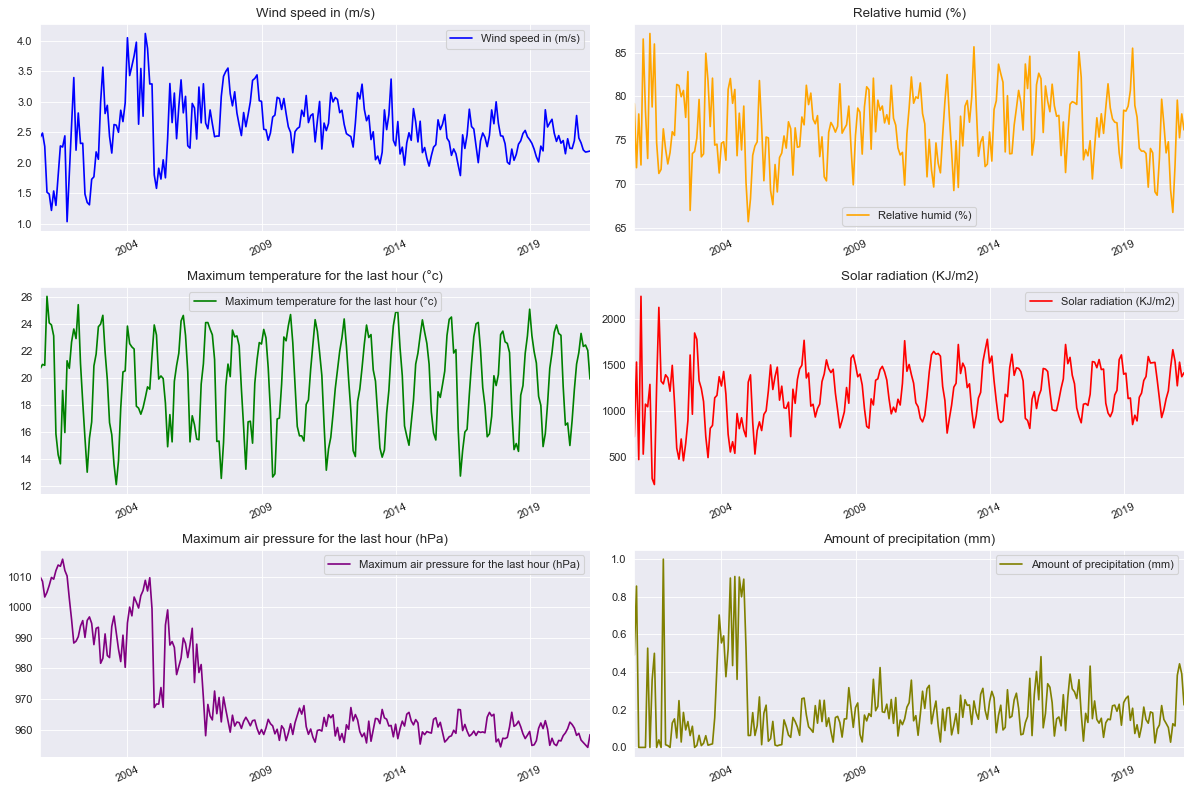

In [8]:
titles = ['Wind speed in (m/s)', 
        'Relative humid (%)', 
        'Maximum temperature for the last hour (°c)', 
        'Solar radiation (KJ/m2)', 
        'Maximum air pressure for the last hour (hPa)', 
        'Amount of precipitation (mm)']
        
feature_keys = ['wdsp', 'hmdy', 'tmax', 'gbrd', 'smax', 'prcp']
colors = [ "blue","orange","green","red","purple","olive"]


def show_raw_visualization(data):
    fig, axes = plt.subplots(
        nrows=3, ncols=2, figsize=(15, 10), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = df.index
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(titles[i]),
            rot=25,
        )
        ax.legend([titles[i]])
        ax.set(xlabel=None)
    plt.tight_layout()



show_raw_visualization(df)

# Step 1
Choose about 3-6 variables from your dataset (2-3 – target variables, the rest - predictors).

Wdsp, hmdy - target variables
tmax, gbrd, smax, prcp - predictors

In [9]:
feature_keys

['wdsp', 'hmdy', 'tmax', 'gbrd', 'smax', 'prcp']

In [10]:
targets = df[['wdsp', 'hmdy']]
predictors = df[['tmax', 'gbrd', 'smax', 'prcp']]
target_var_1 = 'wdsp'
target_var_2 = 'hmdy'
# all = predictors + targets
all = df[feature_keys]

# Step 2
Analyze stationarity of a process (for mathematical expectation and variance) for all chosen variables. Make them more stationary if needed.

In [11]:
from statsmodels.tsa.stattools import adfuller

values = all.values.reshape(-1).tolist()
result = adfuller(values)

print('Augmneted Dickey Fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])
 
print('Critical values:')
for k, v in result[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey Fuller Statistic: -7.370665
p-value: 0.000000
Critical values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


# Step 3
Analyze covariance or correlation function for chosen target variables and mutual correlation functions among predictors and targets.

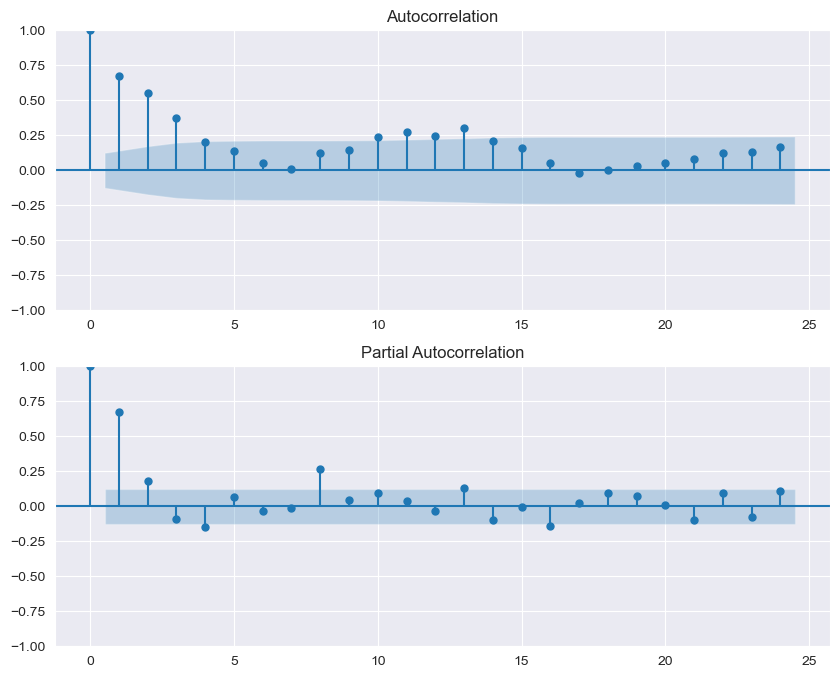

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
plot_acf(df.wdsp, ax = ax1)
plot_pacf(df.wdsp, ax = ax2)
plt.show()

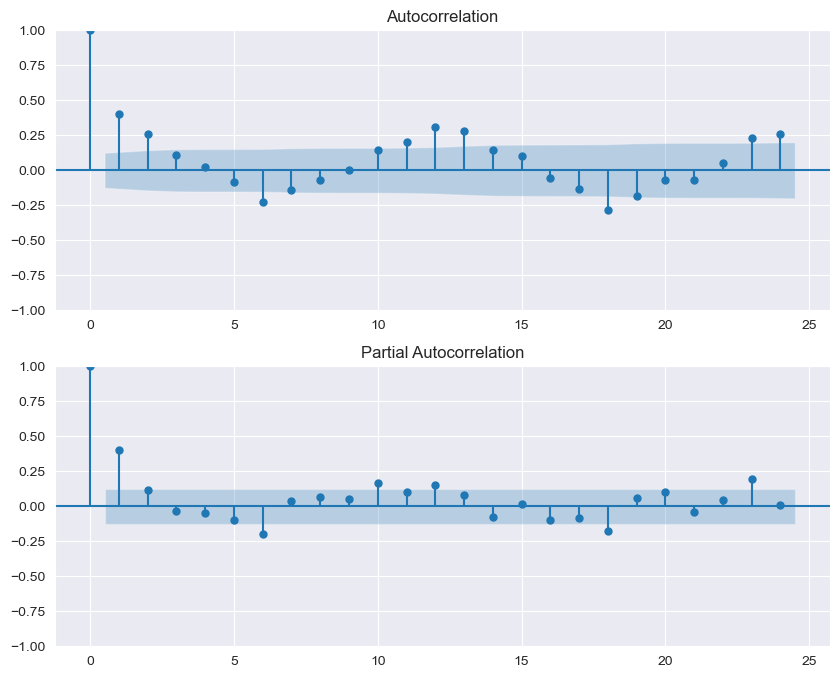

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
plot_acf(df.hmdy, ax = ax1)
plot_pacf(df.hmdy, ax = ax2)
plt.show()

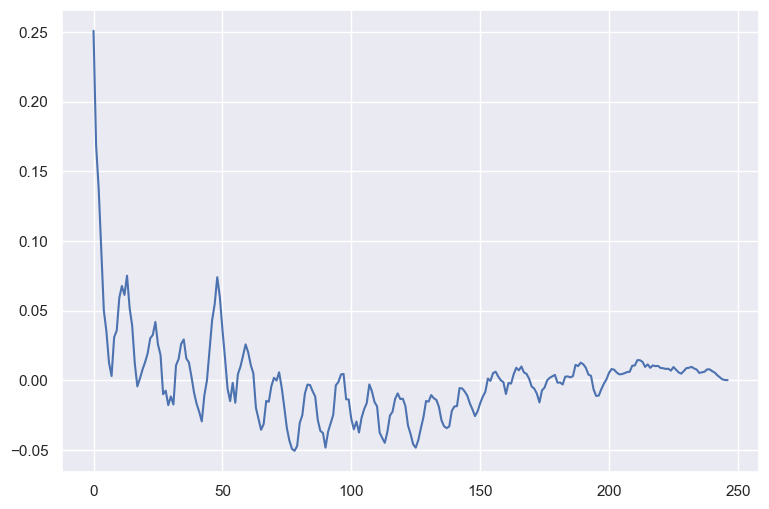

In [14]:
from statsmodels.tsa import stattools

sns.set(rc={'figure.figsize': (9, 6)})

plt.plot(stattools.acovf(all[target_var_1],fft=False))

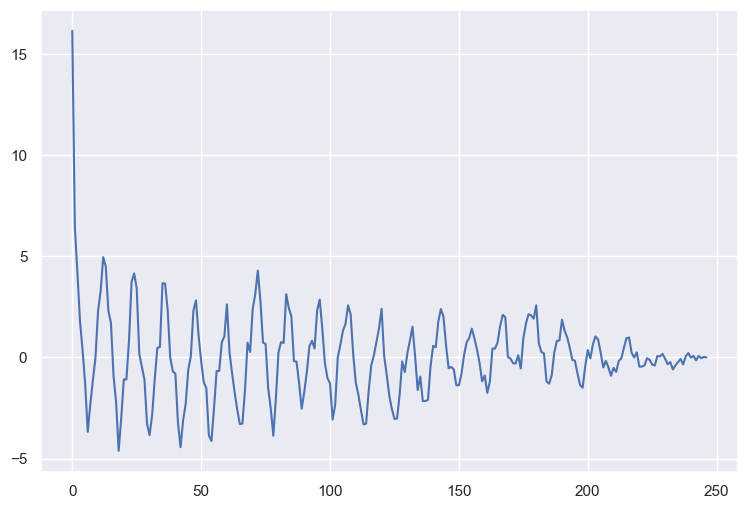

In [15]:
plt.plot(stattools.acovf(all[target_var_2],fft=False))

- `wdsp` -- Wind speed in (m/s)
- `hmdy` -- Relative humid (%) 
- `tmax` -- Maximum temperature for the last hour (°c)
- `gbrd` -- Solar radiation (KJ/m2)
- `smax` -- Maximum air pressure for the last hour (hPa)
- `prcp` -- Amount of precipitation (mm) (осадки)

<AxesSubplot:>

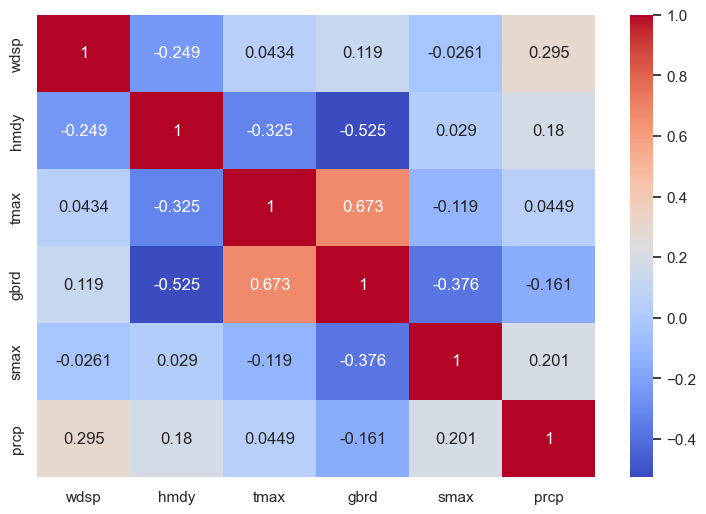

In [16]:
sns.heatmap(all.corr(), annot = True, fmt='.3g',cmap= 'coolwarm')

# Step 4
Filter high frequencies (noise) with chosen 2 filters for target variables.

In [17]:
from fedot.core.data.data import InputData
from fedot.core.pipelines.pipeline import Pipeline
from fedot.core.pipelines.node import PrimaryNode, SecondaryNode
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams
from fedot.core.data.multi_modal import MultiModalData
from fedot.core.data.data_split import train_test_data_setup

index = np.arange(0, len(targets))

In [18]:
def filter_rolling(data):
    time_series = np.array(data)

    task=Task (TaskTypesEnum.ts_forecasting, TsForecastingParams(forecast_length=25))
    input_data = InputData(idx=np.arange(0, len(time_series)), features=time_series,
                           target=time_series,task=task, data_type=DataTypesEnum.ts)


    smoothing_node = PrimaryNode('smoothing')
    smoothing_node.custom_params = {'window_size': 12}

    def node_fit_predict(node, input_data):
        """ Fit node and make prediction """
        node.fit(input_data)
        smoothed_output = node.predict(input_data)
        return smoothed_output

    smoothed_output = node_fit_predict(smoothing_node, input_data)
    return smoothed_output.predict

In [19]:
def filter_gaussian(data):
    time_series = np.array(data)

    task = Task(TaskTypesEnum.ts_forecasting,
                TsForecastingParams(forecast_length=25))

    input_data = InputData(idx=np.arange(0, len(time_series)),
                           features=time_series, target=time_series,
                           task=task, data_type=DataTypesEnum.ts)

    gaussian_node = PrimaryNode('gaussian_filter')
    gaussian_node.custom_params = {'sigma': 6}

    def node_fit_predict(node, input_data):
        """ Fit node and make prediction """
        node.fit(input_data)
        smoothed_output = node.predict(input_data)
        return smoothed_output

    smoothed_gaussian = node_fit_predict(gaussian_node, input_data)
    return smoothed_gaussian.predict

In [20]:
def plot(data):
    # plt.figure(figsize=(20,10))
    plt.plot(index, data , label='Source Time Series')
    plt.plot(index, filter_rolling(data), label='Smoothed by 12 elements', linewidth=3)
    plt.plot(index, filter_gaussian(data), label='Smoothed gaussian filter', linewidth=2, c='red')
    plt.legend()
    plt.show()

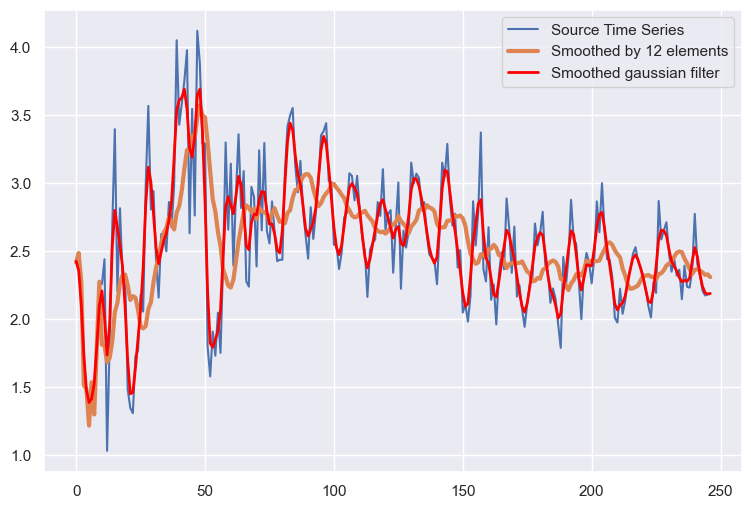

In [21]:
plot(targets.wdsp)

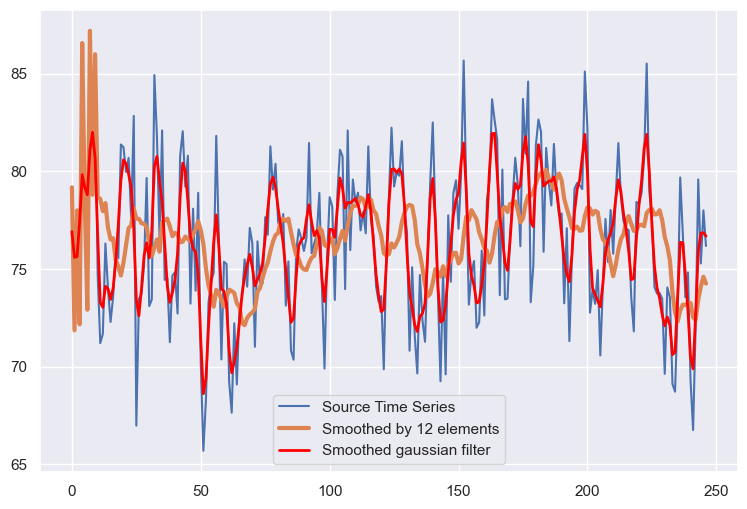

In [22]:
plot(targets.hmdy)

# Step 5 

In [23]:
from scipy import signal

def spectral_density(data):

    window_size = 12
    blackman = signal.blackman(M=window_size)
    bartlett = signal.hann(M=window_size)

    f, Pxx_den = signal.welch(data, fs=1, scaling='spectrum', nfft = 1000) # Spectrum for original data
    f_flt_r, Pxx_flt_r = signal.welch(filter_rolling(data), fs=1, nfft = 1000, scaling='spectrum')
    f_flt_g, Pxx_flt_g = signal.welch(filter_gaussian(data), fs=1, nfft = 1000, scaling='spectrum')


    plt.plot(f, Pxx_den, color="grey", label='Original data')
    plt.plot(f_flt_g, Pxx_flt_g, color="red", label='Gaussian filtered')
    plt.plot(f_flt_r, Pxx_flt_r, color="orange", label='Rolling filtered')


    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.legend()
    plt.xlim((0,0.2))


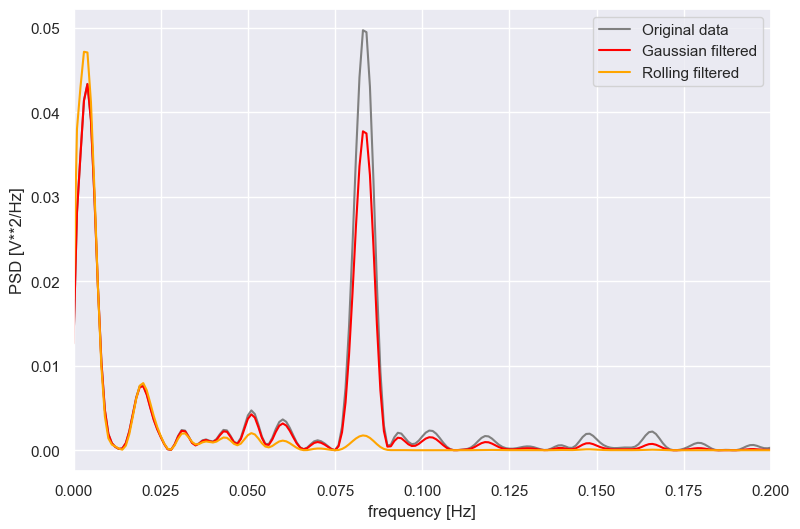

In [24]:
spectral_density(targets.wdsp)

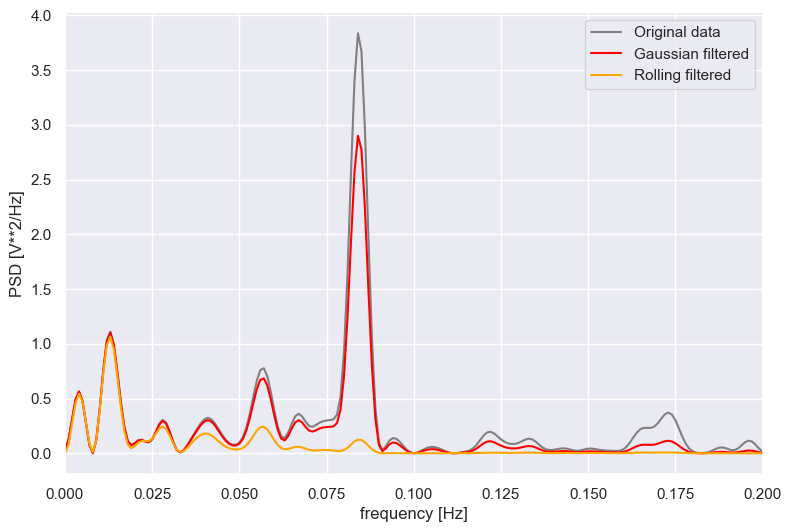

In [25]:
spectral_density(targets.hmdy)

# Step 6

In [26]:
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
model = pm.auto_arima(df['wdsp'],
                      m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=5, test='adf',error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=346.091, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=363.376, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=218.129, Time=0.33 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=278.447, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1174.642, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=216.875, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=218.330, Time=0.17 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=211.030, Time=0.05 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=212.909, Time=0.48 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=212.942, Time=0.14 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=211.044, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=212.306, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : A

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  247
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -101.515
Date:                Fri, 09 Dec 2022   AIC                            211.030
Time:                        02:15:52   BIC                            225.067
Sample:                    10-31-2000   HQIC                           216.681
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6898      0.122      5.639      0.000       0.450       0.930
ar.L1          0.5526      0.054     10.222      0.000       0.447       0.658
ar.L2          0.1762      0.048      3.641      0.000       0.081       0.271
sigma2         0.1328      0.009     15.398      0.000       0.116       0.150
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                36.77
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

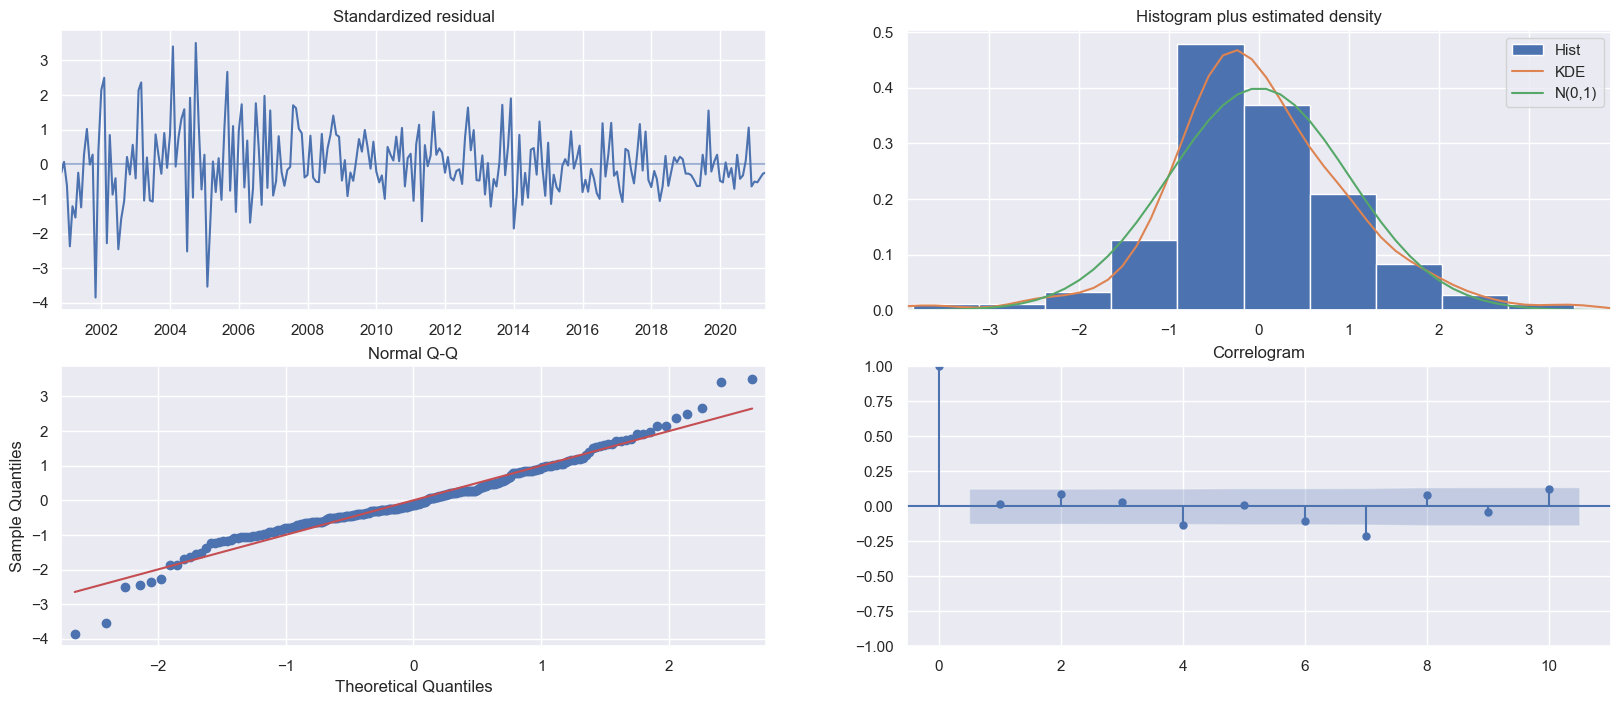

In [29]:
model.plot_diagnostics(figsize=(20,8))
plt.show()

In [30]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [31]:
def graph(data, predictions, test):
    test = pd.DataFrame(test)
    predictions_series = pd.Series(predictions, index = test.index)
    plt.figure(figsize = (15,5))

    plt.plot(data,label = 'Expected Values')
    plt.plot(predictions_series,label = 'Predicted Values');
    plt.legend(loc="upper left")
    plt.show()

In [36]:
def sarimapred(data):
    size = int(len(data) - 50)
    train, test = data[0:size], data[size:len(df)]

    print('\t SARIMA MODEL : In - Sample Forecasting \n')

    history = [x for x in train]
    predictions = []

    for t in range(len(test)):

        model = sm.tsa.statespace.SARIMAX(history,order = (2,0,0),seasonal_order = (0,0,0,12))
        model_fit = model.fit(disp = 0)

        output = model_fit.forecast()

        yhat = output[0]
        predictions.append(float(yhat))

        obs = test[t]
        history.append(obs)

        print('predicted = %f, expected = %f' % (np.exp(yhat), np.exp(obs)))

    graph(data, predictions, test)
    error = np.sqrt(mean_squared_error(np.exp(test),np.exp(predictions)))
    print('Test RMSE: %.4f' % error)
    predictions_series = pd.Series(np.exp(predictions), index = test.index)

	 SARIMA MODEL : In - Sample Forecasting 

predicted = 7.874351, expected = 10.575037
predicted = 9.244185, expected = 12.019994
predicted = 11.269142, expected = 11.205200
predicted = 11.172755, expected = 9.608637
predicted = 9.848447, expected = 11.569077
predicted = 10.661109, expected = 17.548233
predicted = 15.034217, expected = 13.991480
predicted = 14.619029, expected = 20.049755
predicted = 17.454617, expected = 14.109027
predicted = 15.341942, expected = 11.480478
predicted = 11.940485, expected = 11.413055
predicted = 11.162100, expected = 10.079820
predicted = 10.241378, expected = 7.455904
predicted = 8.010652, expected = 7.206325
predicted = 7.135069, expected = 9.239473
predicted = 8.378047, expected = 7.685568
predicted = 7.965305, expected = 8.457308
predicted = 8.040503, expected = 10.007198
predicted = 9.296880, expected = 10.576527
predicted = 10.170124, expected = 11.925497
predicted = 11.237629, expected = 12.540750
predicted = 12.071304, expected = 11.317198
pred

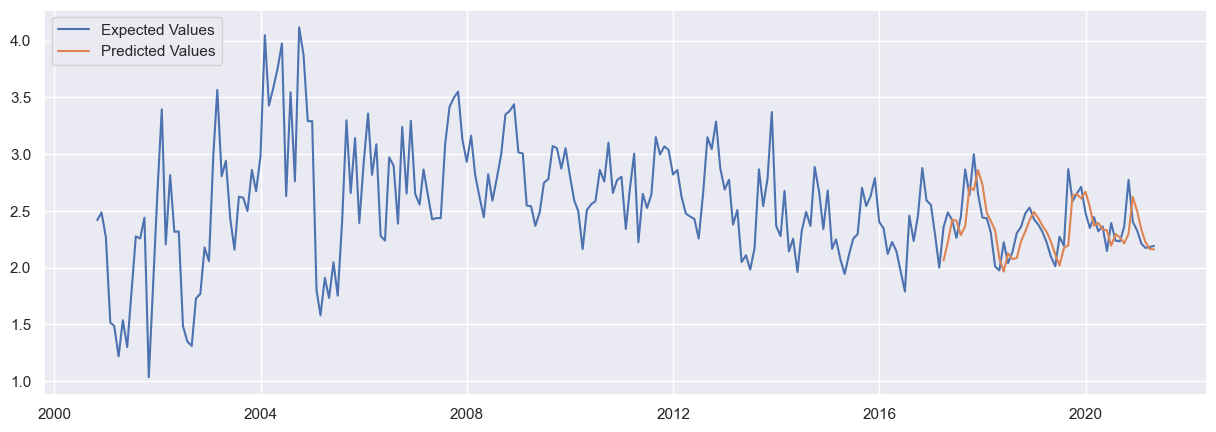

Test RMSE: 2.4725


In [33]:
sarimapred(targets['wdsp'])

In [34]:
targets['fil_wdsp']=filter_gaussian(targets.wdsp)
targets['fil_hmdy']=filter_gaussian(targets.hmdy)

	 SARIMA MODEL : In - Sample Forecasting 

predicted = 8.532818, expected = 9.993202
predicted = 10.543815, expected = 11.014362
predicted = 11.698843, expected = 10.967349
predicted = 10.838471, expected = 10.930376
predicted = 10.809322, expected = 12.371279
predicted = 13.386192, expected = 14.598964
predicted = 16.270832, expected = 15.925127
predicted = 16.780676, expected = 16.178942
predicted = 16.207359, expected = 14.431614
predicted = 13.183570, expected = 12.319042
predicted = 10.909316, expected = 10.968698
predicted = 10.012843, expected = 9.561067
predicted = 8.599258, expected = 8.251918
predicted = 7.371867, expected = 7.907261
predicted = 7.612206, expected = 8.192525
predicted = 8.336179, expected = 8.324521
predicted = 8.354078, expected = 8.760849
predicted = 9.012900, expected = 9.696957
predicted = 10.337868, expected = 10.700481
predicted = 11.381214, expected = 11.558931
predicted = 12.107649, expected = 11.852943
predicted = 11.963460, expected = 11.416718
pred

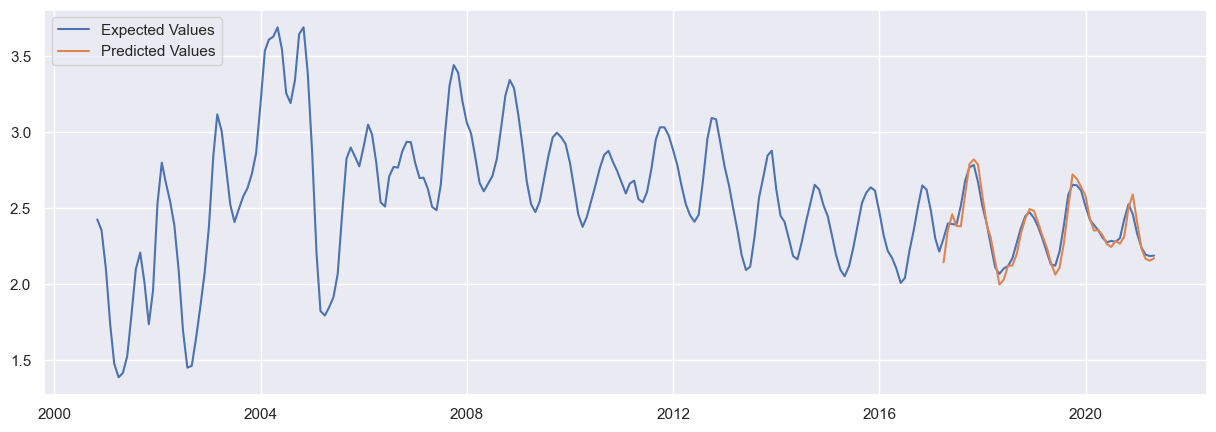

Test RMSE: 0.7039


In [35]:
sarimapred(targets['fil_wdsp'])

	 SARIMA MODEL : In - Sample Forecasting 

predicted = 24856923332998786416419185128112128.000000, expected = 27287296234866574022964977170644992.000000
predicted = 26473253724698914303645539922608128.000000, expected = 22302347259413991025264745699606528.000000
predicted = 22486474842200612893546725806964736.000000, expected = 9239355067104779188314892149100380160.000000
predicted = 649875875180846751748828773480398848.000000, expected = 497451033187969851886306752351698944.000000
predicted = 1605582085418301835283983945621831680.000000, expected = 39791878739635876755310899101696.000000
predicted = 1933146320925328435521303038918656.000000, expected = 127842126996344959755190970351616.000000
predicted = 72851469178379179032109173964800.000000, expected = 62484975192389496941534634835968.000000
predicted = 77610704946994100705569525465088.000000, expected = 351259744297703623794382885355520.000000
predicted = 159561747587580466079578835648512.000000, expected = 44430278804178702668232

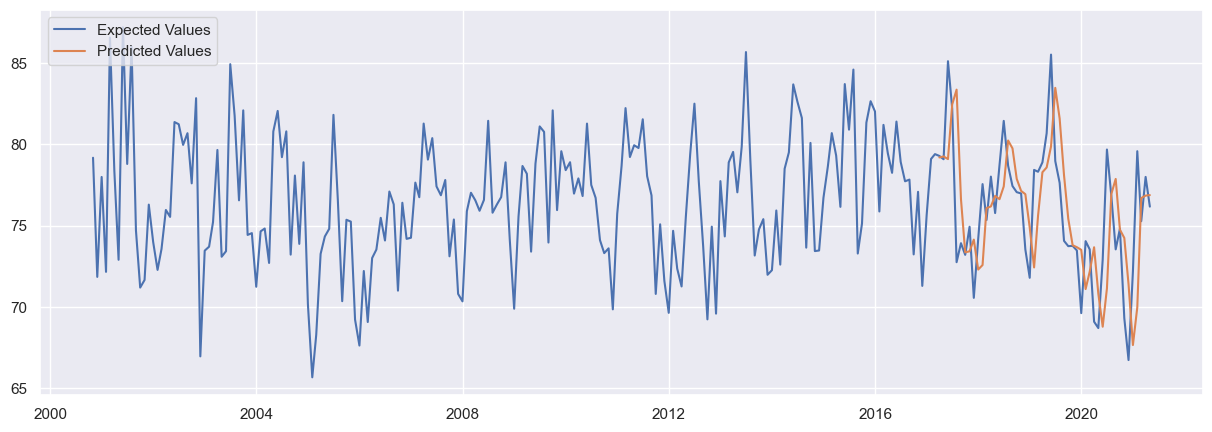

Test RMSE: 3.7732


In [37]:
sarimapred(targets['hmdy'])

	 SARIMA MODEL : In - Sample Forecasting 

predicted = 43088316746599176860538992324509696.000000, expected = 36023741290871601273405746402295808.000000
predicted = 47491417624899146730183613191553024.000000, expected = 117593182504394086830024398611677184.000000
predicted = 235229159926341412870655100076425216.000000, expected = 367652899734251193700176040541814784.000000
predicted = 729525303667331954347788254012506112.000000, expected = 52764938727526629865167118265221120.000000
predicted = 16139692798350027270451647794380800.000000, expected = 1073261903491078114630269057105920.000000
predicted = 96103805701472893707636095057920.000000, expected = 138582844401475021501542399213568.000000
predicted = 38808847198759107474062263189504.000000, expected = 99991321094737584573840858546176.000000
predicted = 80263339752882893011630772191232.000000, expected = 73213741728237740554825328754688.000000
predicted = 59270390567000651288579672113152.000000, expected = 534486792352188676994129545

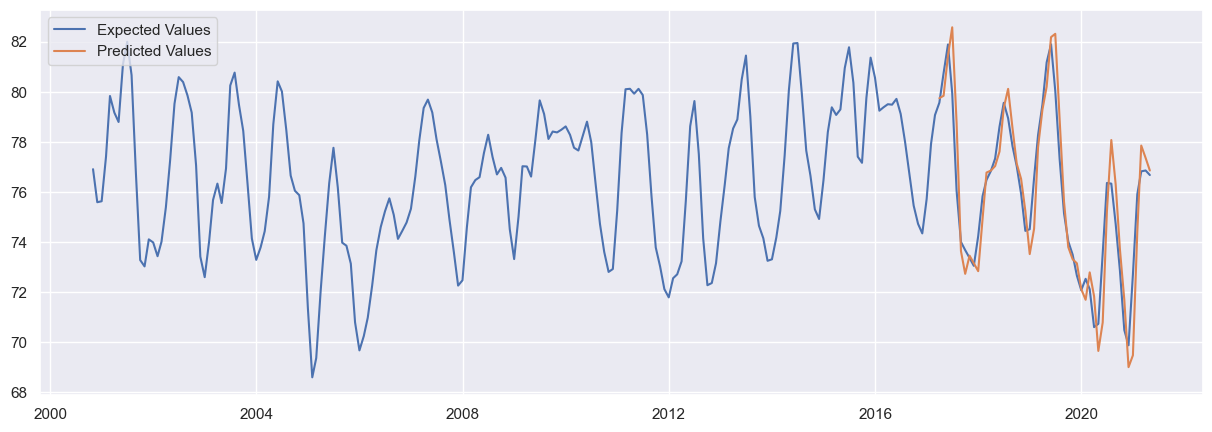

Test RMSE: 1.2085


In [38]:
sarimapred(targets['fil_hmdy'])

# Step 7

In [39]:
def wrap_into_input(forecast_length, feature_time_series, target_time_series):
    task = Task(TaskTypesEnum.ts_forecasting,
                TsForecastingParams(forecast_length=forecast_length))

    input_data = InputData(idx=np.arange(0, len(target_time_series)),
                           features=feature_time_series, target=target_time_series,
                           task=task, data_type=DataTypesEnum.ts)

    return input_data

In [40]:
def ts(target, predictor1, predictor2, predictor3, predictor4, forecast_length):
    ts_1 = wrap_into_input(forecast_length = forecast_length,
                           feature_time_series = np.array(target),
                           target_time_series = np.array(target))

    ts_2 = wrap_into_input(forecast_length = forecast_length,
                           feature_time_series = np.array(predictor1),
                           target_time_series = np.array(target))

    ts_3 = wrap_into_input(forecast_length = forecast_length,
                           feature_time_series = np.array(predictor2),
                           target_time_series = np.array(target))

    ts_4 = wrap_into_input(forecast_length = forecast_length,
                           feature_time_series = np.array(predictor3),
                           target_time_series = np.array(target))

    ts_5 = wrap_into_input(forecast_length = forecast_length,
                           feature_time_series = np.array(predictor4),
                           target_time_series = np.array(target))

    dataset = MultiModalData({
        f'data_source_ts/{target}': ts_1,
        f'data_source_ts/{predictor1}': ts_2,
        f'data_source_ts/{predictor2}': ts_3,
        f'data_source_ts/{predictor3}': ts_4,
        f'data_source_ts/{predictor4}': ts_5
    })

    return ts_1, ts_2, ts_3, ts_4, ts_5, dataset

In [41]:
def create_multisource_pipeline(target, predictor1, predictor2, predictor3, predictor4):
    """ Generate pipeline with several data sources """
    node_source_1 = PrimaryNode(f'data_source_ts/{target}')
    node_source_2 = PrimaryNode(f'data_source_ts/{predictor1}')
    node_source_3 = PrimaryNode(f'data_source_ts/{predictor2}')
    node_source_4 = PrimaryNode(f'data_source_ts/{predictor3}')
    node_source_5 = PrimaryNode(f'data_source_ts/{predictor4}')

    node_lagged_1 = SecondaryNode('lagged', nodes_from=[node_source_1])
    node_lagged_2 = SecondaryNode('lagged', nodes_from=[node_source_2])
    node_lagged_3 = SecondaryNode('lagged', nodes_from=[node_source_3])
    node_lagged_4 = SecondaryNode('lagged', nodes_from=[node_source_4])
    node_lagged_5 = SecondaryNode('lagged', nodes_from=[node_source_5])

    node_ridge = SecondaryNode('ridge', nodes_from=[node_lagged_1])
    node_lasso_2 = SecondaryNode('lasso', nodes_from=[node_lagged_2])
    node_lasso_3 = SecondaryNode('lasso', nodes_from=[node_lagged_3])
    node_lasso_4 = SecondaryNode('lasso', nodes_from=[node_lagged_4])
    node_lasso_5 = SecondaryNode('lasso', nodes_from=[node_lagged_5])

    node_final = SecondaryNode('linear', nodes_from=[node_ridge, node_lasso_2, node_lasso_3, node_lasso_4, node_lasso_5])
    pipeline = Pipeline(node_final)
    return pipeline

2022-12-09 02:18:17,688 - OperationTypesRepository - Operation lagged not found in the repository
2022-12-09 02:18:17,690 - OperationTypesRepository - Operation data_source_ts not found in the repository
2022-12-09 02:18:17,691 - OperationTypesRepository - Operation lagged not found in the repository
2022-12-09 02:18:17,693 - OperationTypesRepository - Operation data_source_ts not found in the repository
2022-12-09 02:18:17,694 - OperationTypesRepository - Operation lagged not found in the repository
2022-12-09 02:18:17,696 - OperationTypesRepository - Operation data_source_ts not found in the repository
2022-12-09 02:18:17,698 - OperationTypesRepository - Operation lagged not found in the repository
2022-12-09 02:18:17,699 - OperationTypesRepository - Operation data_source_ts not found in the repository
2022-12-09 02:18:17,700 - OperationTypesRepository - Operation lagged not found in the repository
2022-12-09 02:18:17,700 - OperationTypesRepository - Operation data_source_ts not foun

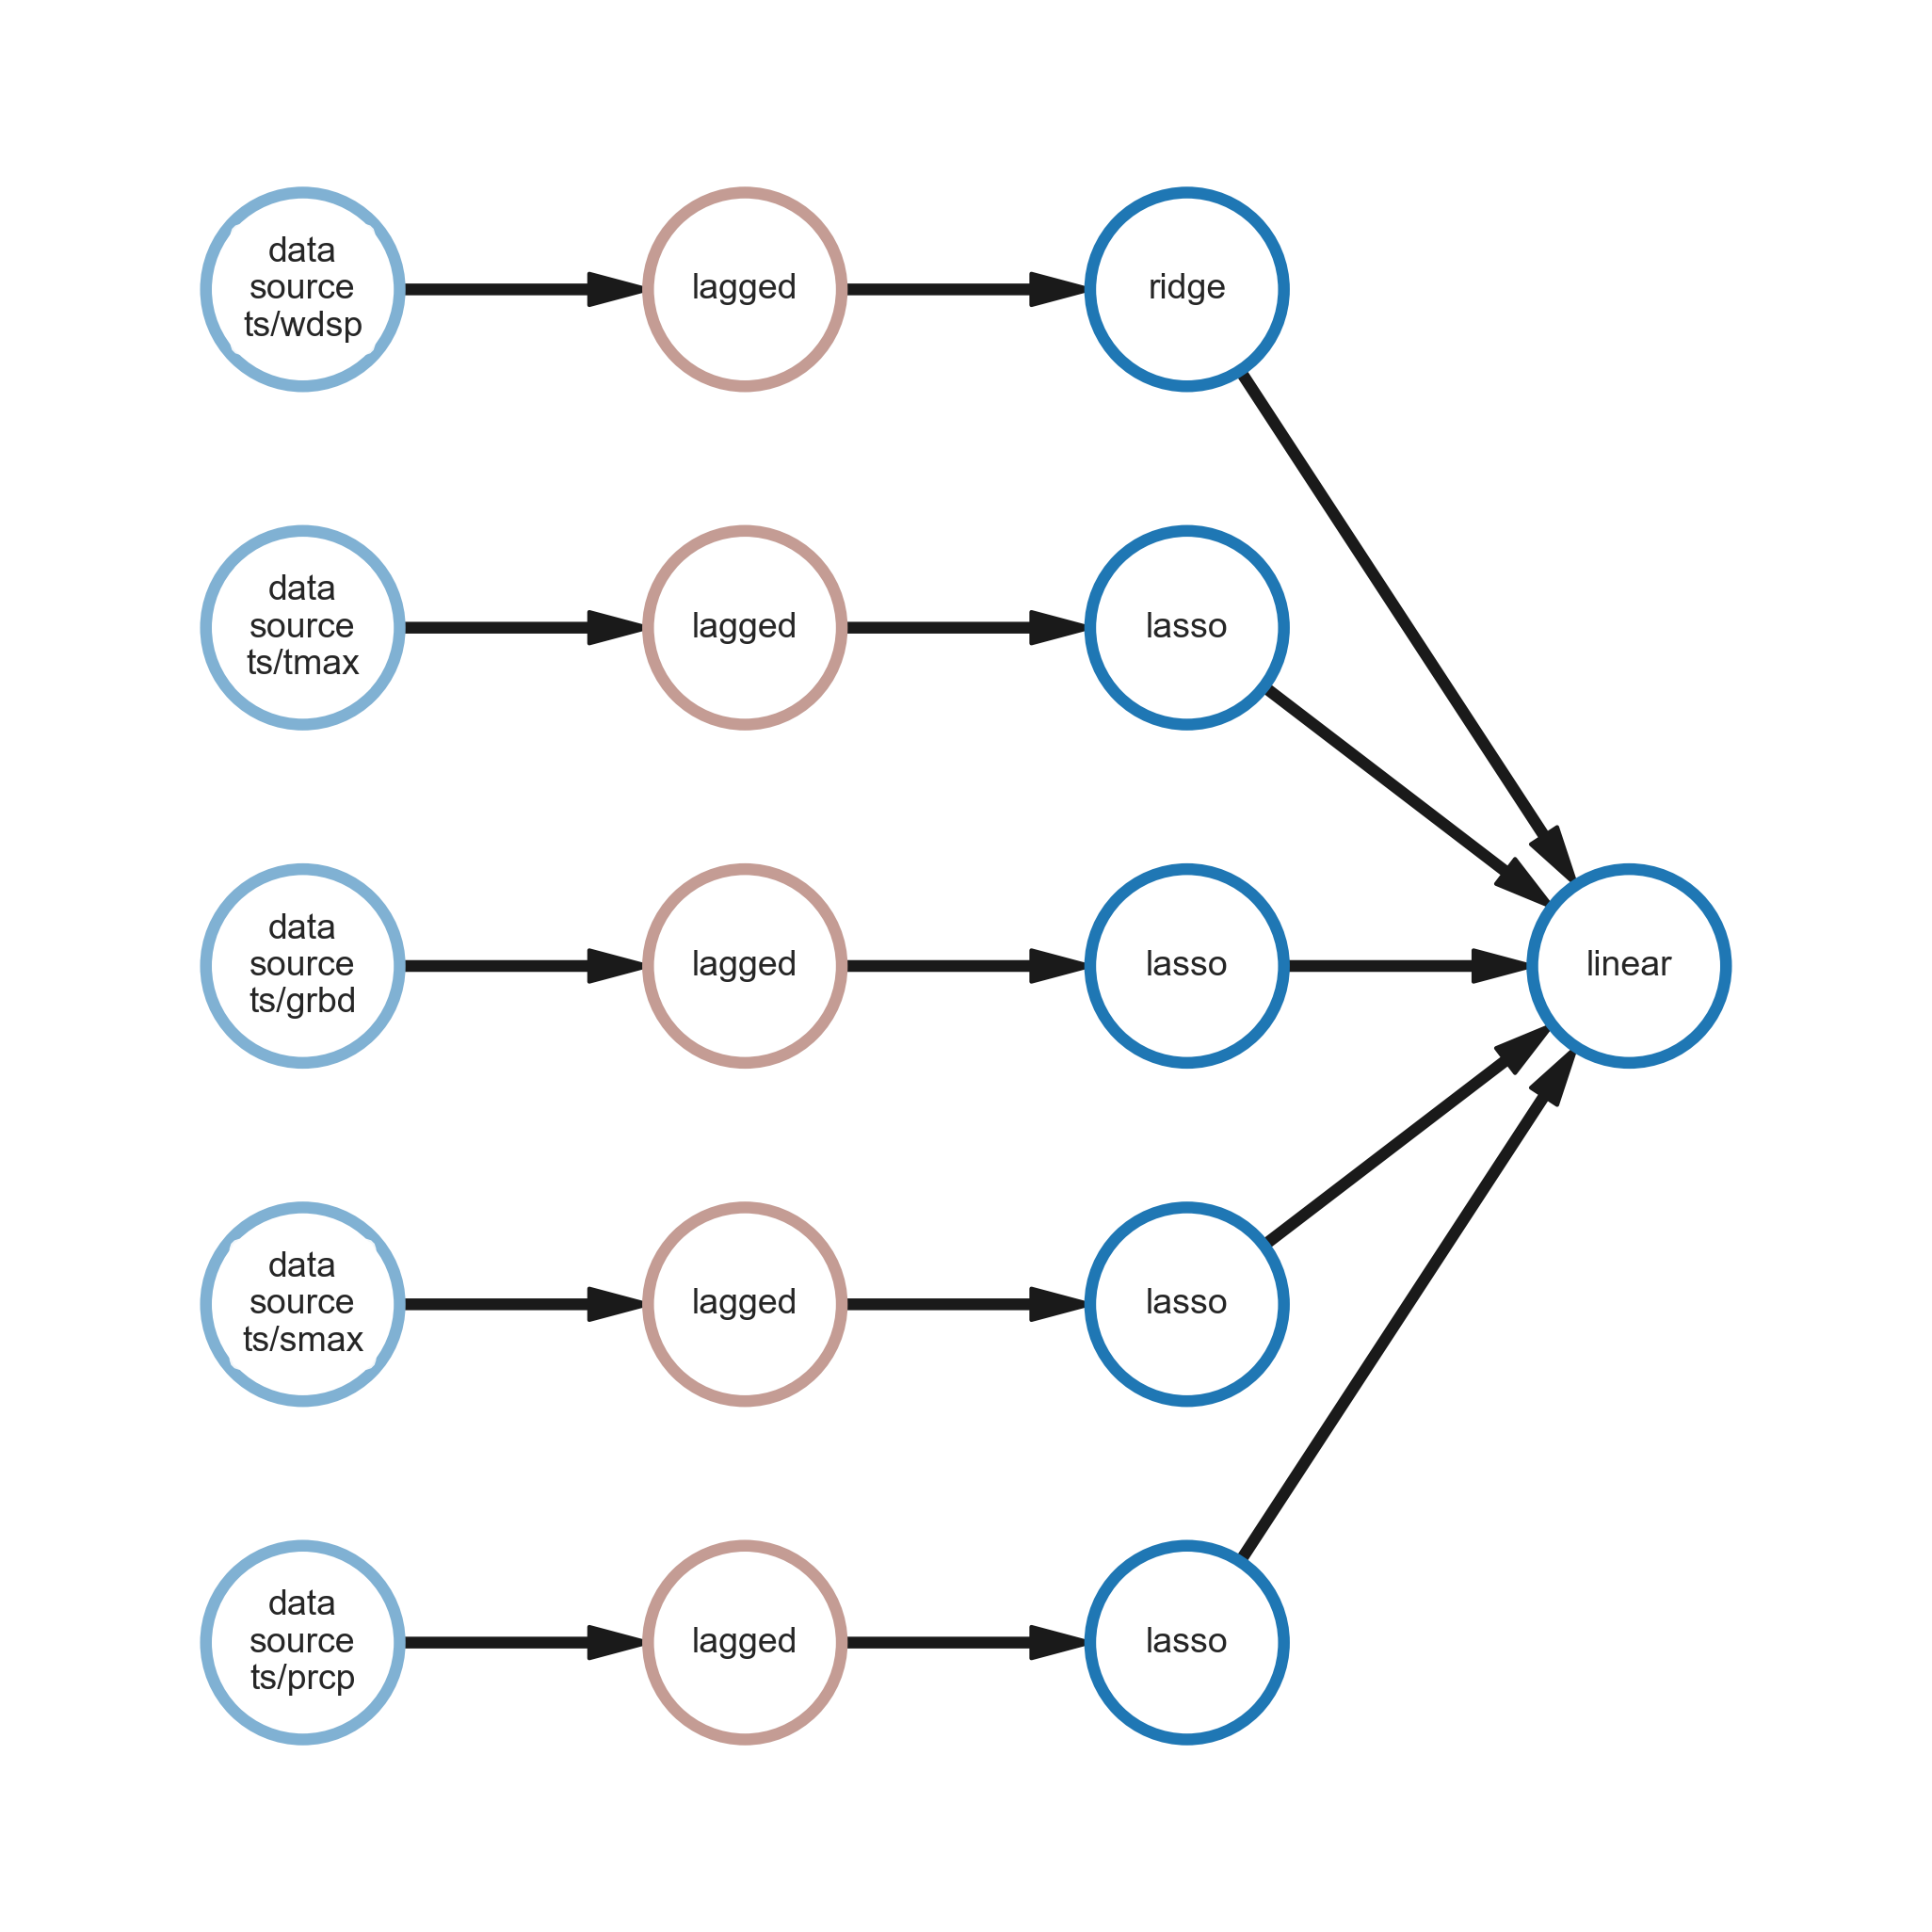

In [42]:
forecast_length = 50

target = targets['wdsp']
predictor1 = predictors['tmax']
predictor2 = predictors['gbrd']
predictor3 = predictors['smax']
predictor4 = predictors['prcp']

ts_1, ts_2, ts_3, ts_4, ts_5, dataset = ts(target = target, predictor1 = predictor1, predictor2 = predictor2, predictor3 = predictor3, predictor4 = predictor4, forecast_length = forecast_length)

train, test = train_test_data_setup(dataset)

pipeline = create_multisource_pipeline(target = 'wdsp', predictor1 = 'tmax', predictor2 = 'grbd', predictor3 = 'smax', predictor4 = 'prcp',)
pipeline.show()


In [43]:
pipeline = create_multisource_pipeline(target = target, predictor1 = predictor1, predictor2 = predictor2, predictor3 = predictor3, predictor4 = predictor4)

pipeline.fit(train)
forecast = pipeline.predict(test)

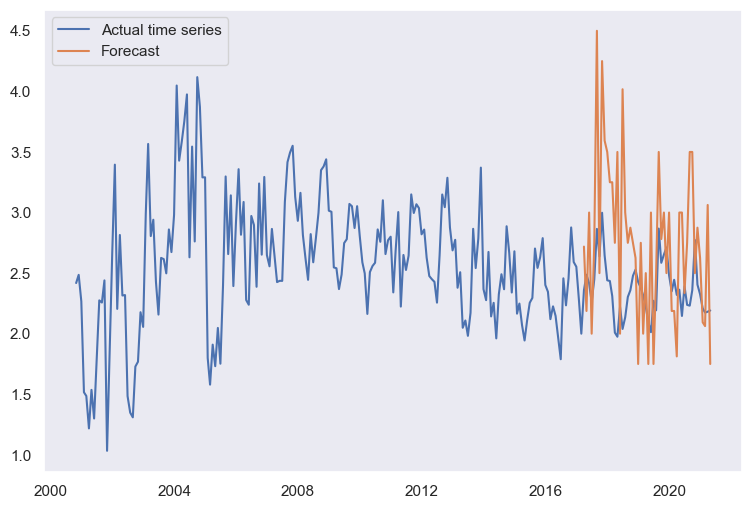

MAE metric value: 0.58


In [44]:
df.loc[197:, 'forwdsp'] = forecast.predict.reshape(-1)

plt.plot(df.wdsp, label='Actual time series')
plt.plot(df.forwdsp, label='Forecast')
plt.legend()
plt.grid()
plt.show()

metric = mean_absolute_error(test[f'data_source_ts/{df.wdsp}'].target, np.ravel(forecast.predict))
print(f'MAE metric value: {metric:.2f}')

2022-12-09 02:18:18,310 - OperationTypesRepository - Operation lagged not found in the repository
2022-12-09 02:18:18,311 - OperationTypesRepository - Operation data_source_ts not found in the repository
2022-12-09 02:18:18,312 - OperationTypesRepository - Operation lagged not found in the repository
2022-12-09 02:18:18,313 - OperationTypesRepository - Operation data_source_ts not found in the repository
2022-12-09 02:18:18,313 - OperationTypesRepository - Operation lagged not found in the repository
2022-12-09 02:18:18,314 - OperationTypesRepository - Operation data_source_ts not found in the repository
2022-12-09 02:18:18,315 - OperationTypesRepository - Operation lagged not found in the repository
2022-12-09 02:18:18,316 - OperationTypesRepository - Operation data_source_ts not found in the repository
2022-12-09 02:18:18,317 - OperationTypesRepository - Operation lagged not found in the repository
2022-12-09 02:18:18,317 - OperationTypesRepository - Operation data_source_ts not foun

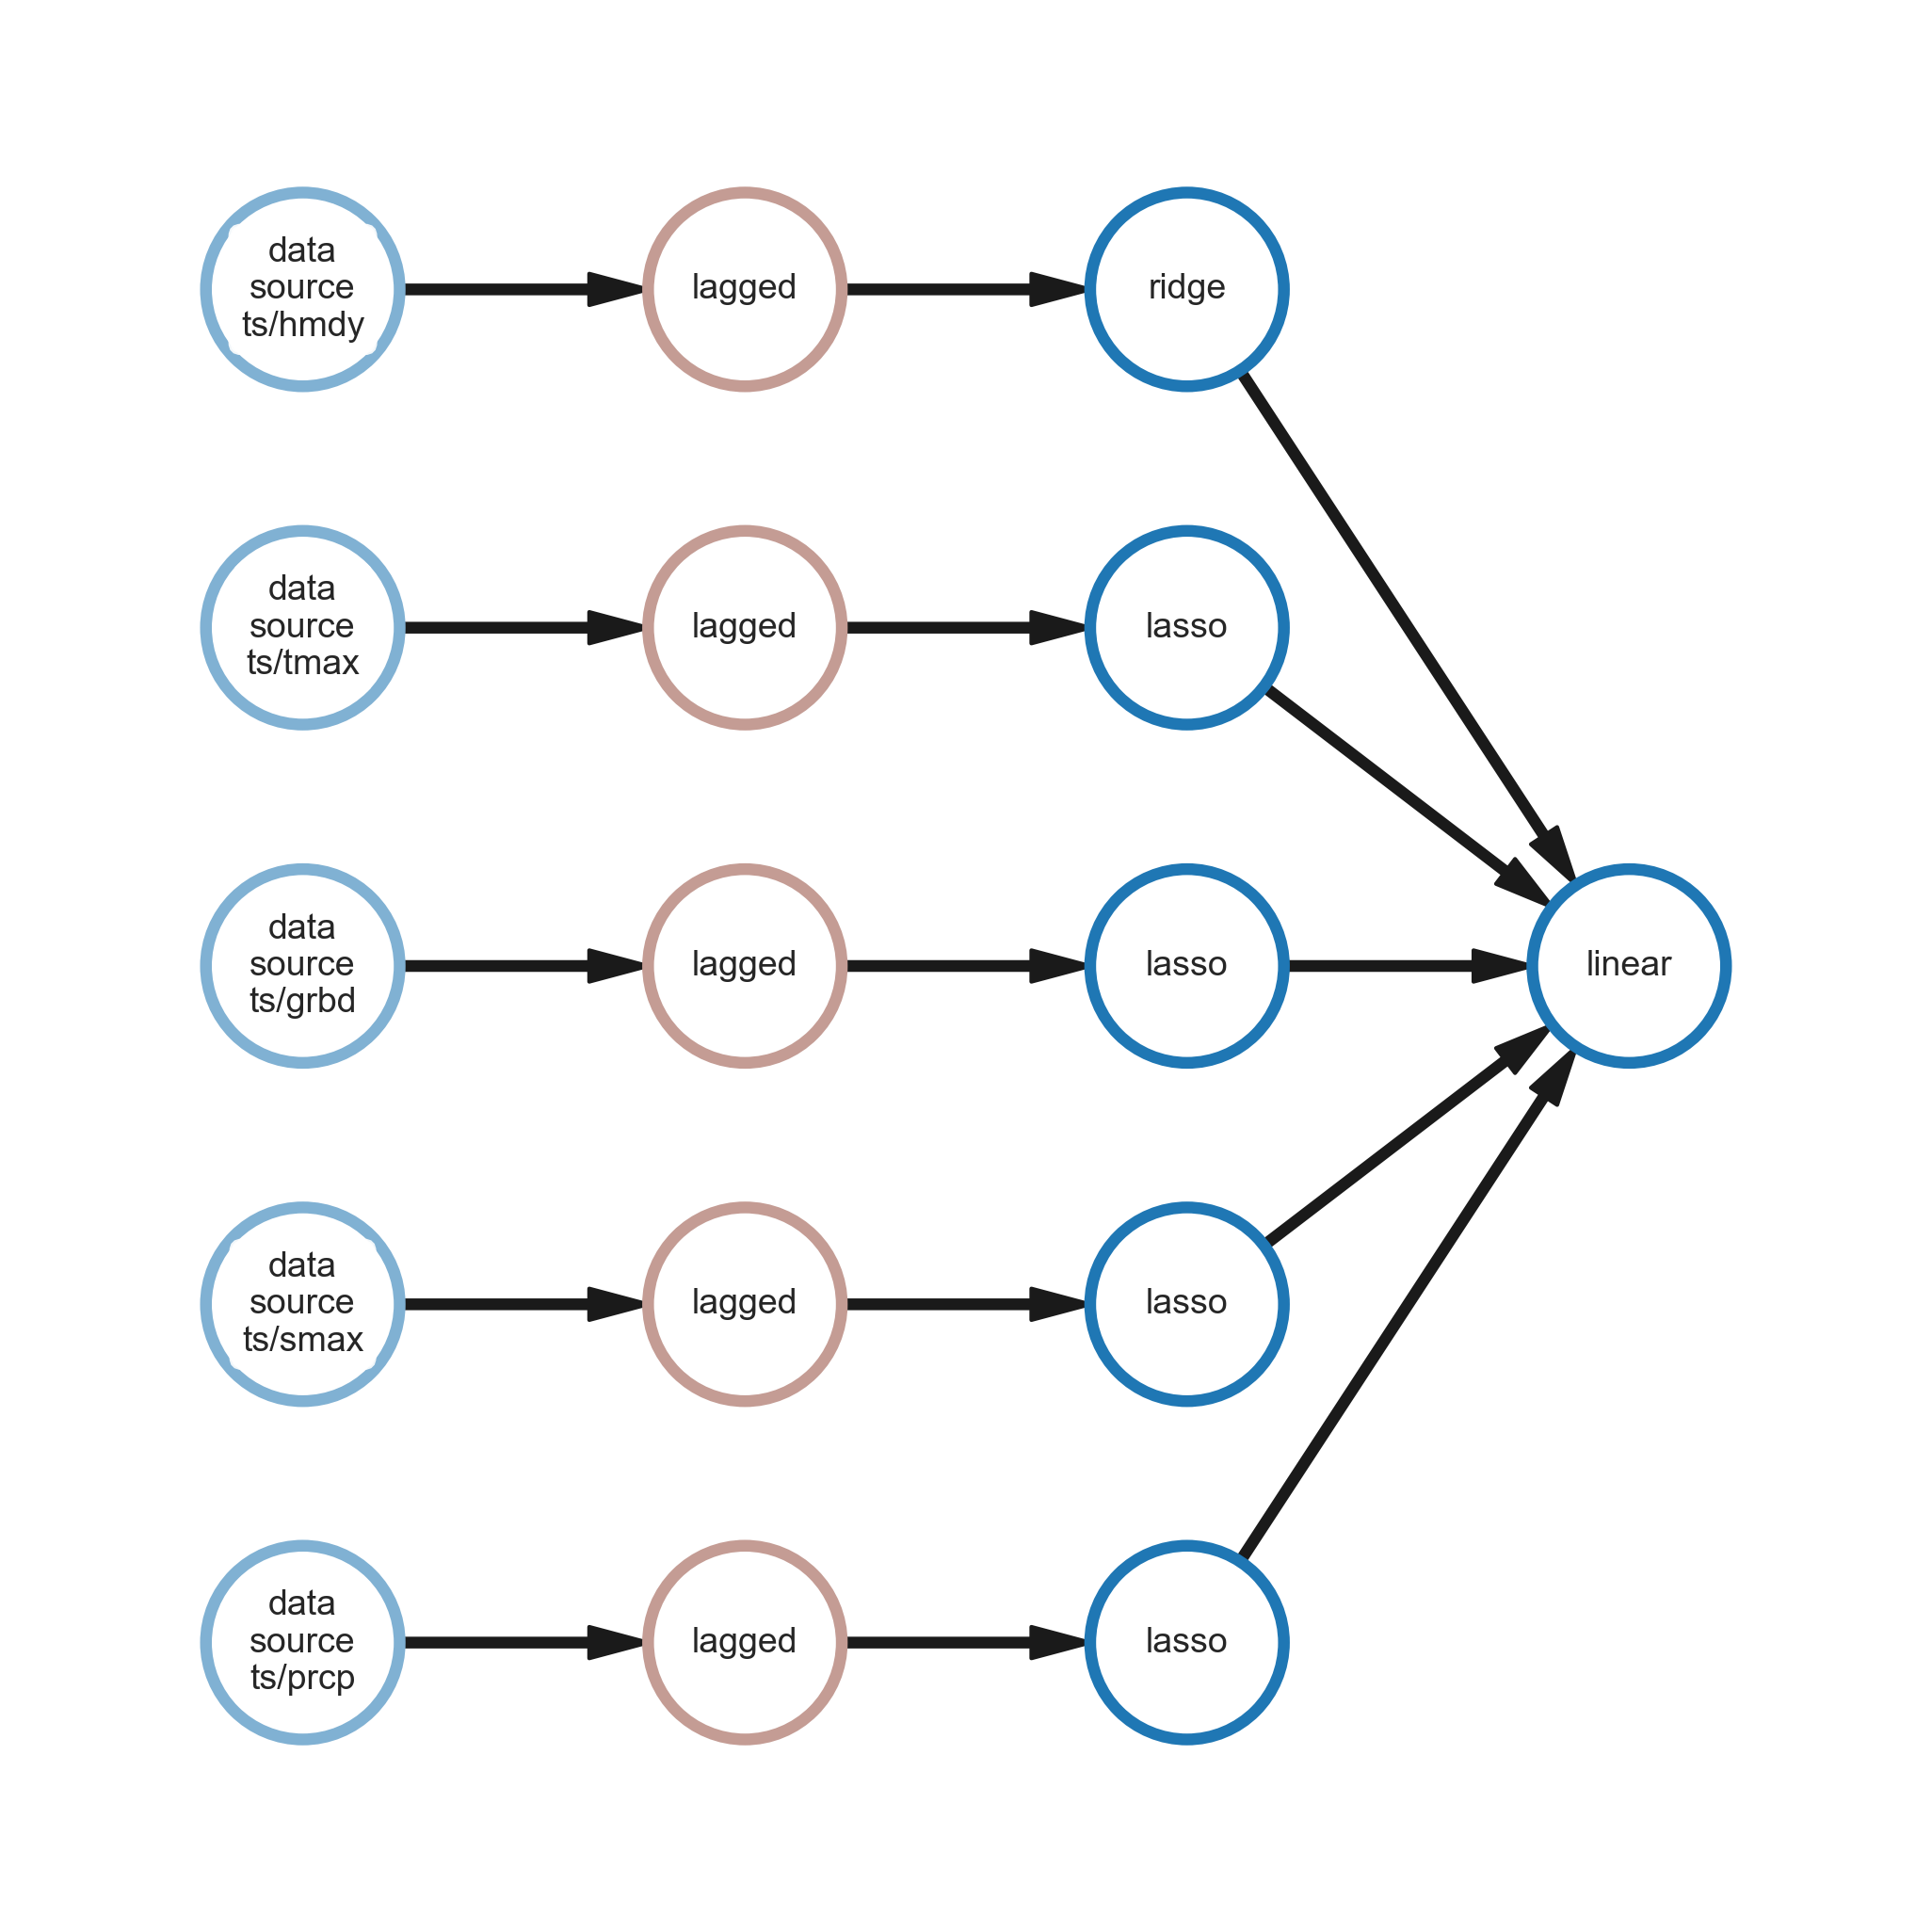

In [45]:
forecast_length = 50

target = targets['hmdy']
predictor1 = predictors['tmax']
predictor2 = predictors['gbrd']
predictor3 = predictors['smax']
predictor4 = predictors['prcp']

ts_1, ts_2, ts_3, ts_4, ts_5, dataset = ts(target = target, predictor1 = predictor1, predictor2 = predictor2, predictor3 = predictor3, predictor4 = predictor4, forecast_length = forecast_length)

train, test = train_test_data_setup(dataset)

pipeline = create_multisource_pipeline(target = 'hmdy', predictor1 = 'tmax', predictor2 = 'grbd', predictor3 = 'smax', predictor4 = 'prcp',)
pipeline.show()


In [46]:
pipeline = create_multisource_pipeline(target = target, predictor1 = predictor1, predictor2 = predictor2, predictor3 = predictor3, predictor4 = predictor4)

pipeline.fit(train)
forecast = pipeline.predict(test)

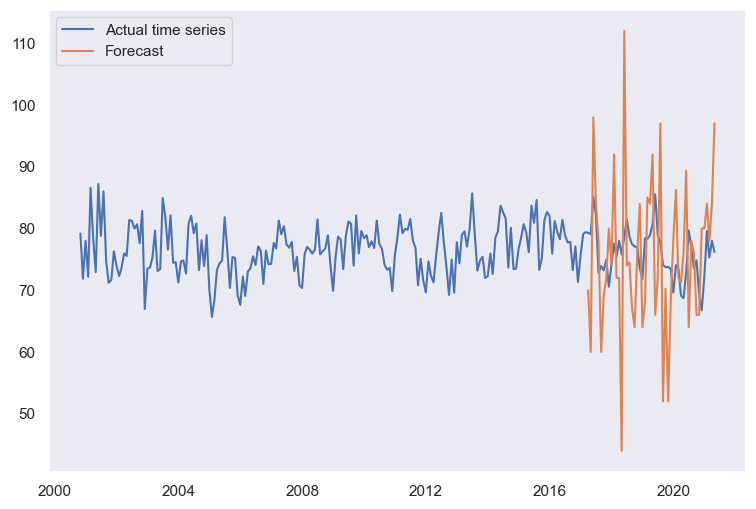

MAE metric value: 9.78


In [47]:
df.loc[197:, 'forhmdy'] = forecast.predict.reshape(-1)

plt.plot(df.hmdy, label='Actual time series')
plt.plot(df.forhmdy, label='Forecast')
plt.legend()
plt.grid()
plt.show()

metric = mean_absolute_error(test[f'data_source_ts/{df.hmdy}'].target, np.ravel(forecast.predict))
print(f'MAE metric value: {metric:.2f}')